***
***

# <center>Prevendo vendas de carros</center>

### <center>Machine Learning - Alura IV</center>

***

<img src="https://cdn-br.comparabien.com/field/image/comprar_carro.jpg" width=70%>

***

# Descrição:

> Neste projeto iremos análisar e desenvolver um modelo utilizando <b>aprendizagem de máquina</b> capaz de prever se determinado carro irá ou não ser vendido com base nos seus atributos. Todos os dados foram disponibilizado pela empresa <b>Alura</b>.

# Esborço: <br>
A. **Instalação e Importação das Bibliotecas Básicas**<br>
I. [Importações](#Importações)<br>
II. [Verificações](#Verificações)<br>

B. **Importando Base de Dados**<br>
I. [Carregando a base de dados](#carregando)<br>
II. [Estrutura da base de dados](#estrutura)<br>
III. [Informações gerais sobre os dados](#informações)<br>

C. **Análise Descritiva**<br>
I. [Análises Gráficas](#analise_grafica)<br>

D. **Separando os Dados**<br>
I. [Separando em dados de treino e teste](#train_test_)<br>

E. **Algoritmo de Base**<br>
Ei. [DummyClassifer](#dummy)<br>

F. **Arvore de Decisão**<br>
Fi. [DecisionTreeClassifier](#decision)<br>
Fii. [Visualizando Arvore](#arvore)<br>

***

# A. Importação das Bibliotecas Básicas <br>

> Nesta primeira etapa, importarei e verificarei todas as principais bibliotecas básicas que serão usadas ao longo do projeto, lembrando que essas são as bibliotecas básicas nas quais a maioria dos projetos que envolvem análise de dados e construção de modelos preditivos usa. Os links para a documentação de cada biblioteca estão abaixo.

> * matplotlib-: https://matplotlib.org/
> * Pytorch-: https://pytorch.org/
> * seaborn-: https://seaborn.pydata.org/
> * Pandas-: https://pandas.pydata.org/docs/#
> * numpy-: https://numpy.org/

## Ai. Importações:

<a id="Importações"></a>

In [1]:
# Ignoring Errors
import warnings
warnings.simplefilter("ignore")

import matplotlib

In [5]:
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import pandas as pd
import numpy as np

## Aii. Verificando as Versões Instaladas:

<a id ="Verificações"></a>

In [6]:
print('---------= Versions =---------')
print(f'  Matplotlib version-: {matplotlib.__version__}')
print(f'  Seaborn version-: {sns.__version__}')
print(f'  Pandas version-: {pd.__version__}')
print(f'  Numpy version-: {np.__version__}')
print('-' * 29)

---------= Versions =---------
  Matplotlib version-: 3.1.3
  Seaborn version-: 0.10.0
  Pandas version-: 0.25.3
  Numpy version-: 1.18.1
-----------------------------


***

# B. Importando a Base de Dados <br>

## Bi. Carregando a Base de Dados:

<a id="carregando"></a>

In [22]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

# Criando novas colunas
dados['km_por_ano'] = dados['mileage_per_year'] * 1.60934
ano_atual = date.today().year
dados['idade_do_modelo'] = ano_atual - dados['model_year']

# Mapeando e substituindo os valores da coluna Vendido/Sold | Yes -> 1 and No -> 0
dados['sold'] = dados['sold'].map({'no' : 0, 'yes' : 1})

# Removendo
dados.drop(columns=["Unnamed: 0", "mileage_per_year", "model_year"], inplace = True)

# Renomeando as colunas para pt-br
dados.columns = ["Preco", 'Vendido', 'km_por_ano', 'idade_do_modelo']

# Visualizando os dados com uma mapa de cores representativo
dados.head(10).style.background_gradient(cmap="Greens", subset=["Preco"])\
                    .background_gradient(cmap="Reds", subset=["Vendido"])\
                    .background_gradient(cmap="Blues", subset=["km_por_ano"])\
                    .background_gradient(cmap="Blues", subset=["idade_do_modelo"])

,Preco,Vendido,km_por_ano,idade_do_modelo
0,30941,1,35085.2,20
1,40558,1,12622.1,22
2,89627.5,0,11440.8,14
3,95276.1,0,43167.3,5
4,117385,1,12770.1,6
5,55405.3,1,23594.5,13
6,93415.6,1,16077.3,18
7,65265.1,0,18666.7,12
8,43917.5,1,12607.6,21
9,107860,1,24000.1,17


## Bii. Estrutura dos Dados:

<a id ="estrutura"></a>

In [8]:
# Imprimindo a estrutura dos dados em uma tupla utilizando o atributo shape do pandas
dados.shape

(10000, 4)

In [9]:
# Imprimindo a estrutura dos dados para fácil entendimento
print('--= Estrutura dos Dados =--')
print(f'    {dados.shape[0]} - Linhas')
print(f'    {dados.shape[1]} - Colunas')
print('-----------------------------')

--= Estrutura dos Dados =--
    10000 - Linhas
    4 - Colunas
-----------------------------


## Biii. Informações Gerais:

<a id = "informações"></a>

In [10]:
# Imprimindo as informações gerais dos dados com o método info do pandas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
Preco              10000 non-null float64
Vendido            10000 non-null int64
km_por_ano         10000 non-null float64
idade_do_modelo    10000 non-null int64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


# C. Análise Descritiva <br>

## Ci. Análises Gráficas 
<a id="analise_grafica"></a>

### Distribuições de Frequência

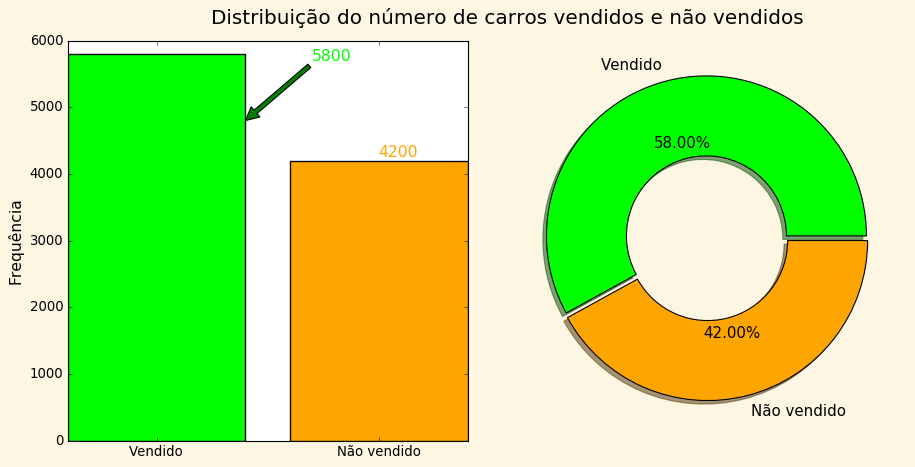

In [99]:
#eixo1.set_title('Distribuição do número de carros vendidos e não vendidos', fontsize = 16, pad=10);

# Tamanho e estilo do gráfico
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize=(5, 5))
plt.style.use('classic')

eixo1 = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([1.1, 0, 1, 1])

# Atributos do gráfico
indice = ['Vendido', 'Não vendido']
values = dados['Vendido'].value_counts().values
cores = ['lime', 'orange']

# Gráfico I - gráfico de barras
eixo1.bar(indice, values, lw=1.2, edgecolor='k', color=cores)
eixo1.tick_params(labelsize=12, color = 'k')

# Labels
eixo1.set_ylabel('Frequência', fontsize = 14)

# Anotações
eixo1.annotate(f"{values[0]}", xy=(0.4, 4800), fontsize = 14, color=cores[0],
              xytext=(.7, 5700), arrowprops=dict(facecolor='g'))
eixo1.annotate(f"{values[1]}", xy=(1, 4250), fontsize = 14, color=cores[1])


# Gráfico II - Gráfico de Pizza
eixo2.pie(values, colors=cores, autopct='%.2f%%', textprops={'size' : 13.5}, shadow=True,
         wedgeprops=dict(width=.5), labels=indice, explode=(.03, 0))

eixo1.set_title('Distribuição do número de carros vendidos e não vendidos', fontsize = 18, pad=15, x=1.1);

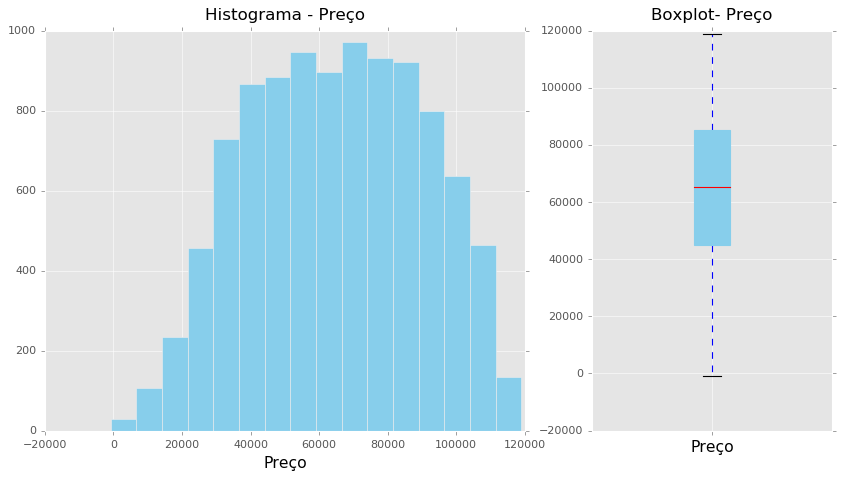

In [147]:
# Tamanho e estilo do gráfico
plt.style.use('ggplot')
fig = plt.figure(figsize=(6, 5))

eixo1 = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([1.14, 0, .5, 1])

# Gráfico - Histograma
eixo1.hist(dados['Preco'], bins = 16, color='skyblue')

# Labels
eixo1.set_xlabel('Preço', fontsize = 14, color = 'k')
eixo1.set_title('Histograma - Preço', fontsize = 15, pad=10)

# Gráfico II - Boxplot
boxes = eixo2.boxplot(dados['Preco'], patch_artist=True)
eixo2.set_xticklabels(['Preço'], fontsize = 14, color='k')
for caixa, cor in zip(boxes['boxes'], cores):
    caixa.set(color='skyblue')
eixo2.set_title('Boxplot- Preço', fontsize = 15, pad=10)
fig.savefig("hist1.png", bbox_inches='tight')

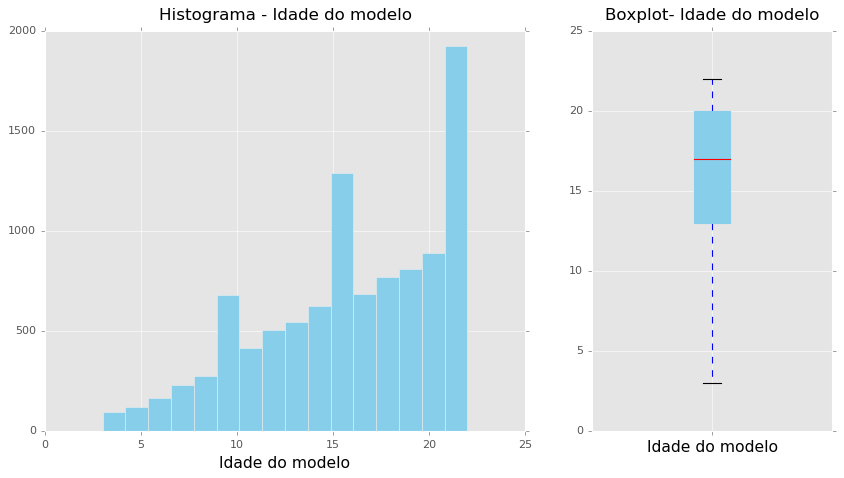

In [148]:
# Tamanho e estilo do gráfico
plt.style.use('ggplot')
fig = plt.figure(figsize=(6, 5))

eixo1 = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([1.14, 0, .5, 1])

# Gráfico - Histograma
eixo1.hist(dados['idade_do_modelo'], bins = 16, color='skyblue')

# Labels
eixo1.set_xlabel('Idade do modelo', fontsize = 14, color = 'k')
eixo1.set_title('Histograma - Idade do modelo', fontsize = 15, pad=10)

# Gráfico II - Boxplot
boxes = eixo2.boxplot(dados['idade_do_modelo'], patch_artist=True)
eixo2.set_xticklabels(['Idade do modelo'], fontsize = 14, color='k')
for caixa, cor in zip(boxes['boxes'], cores):
    caixa.set(color='skyblue')
eixo2.set_title('Boxplot- Idade do modelo', fontsize = 15, pad=10)
fig.savefig("hist2.png", bbox_inches="tight")

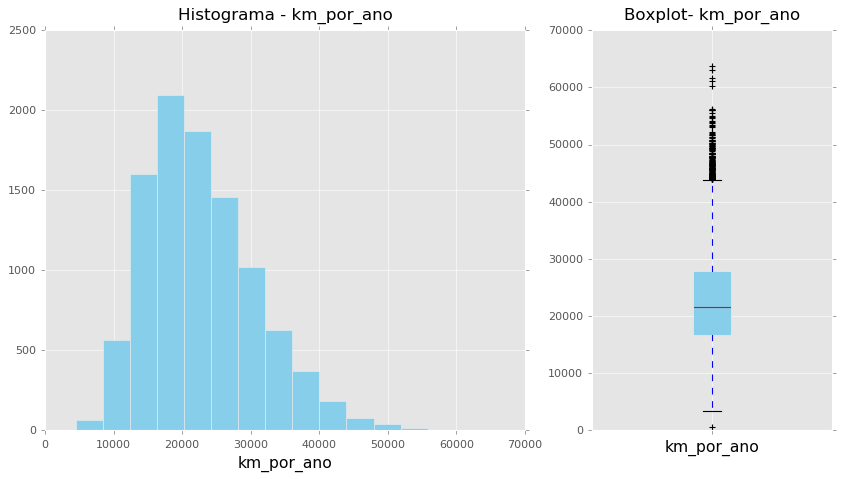

In [154]:
# Tamanho e estilo do gráfico
plt.style.use('ggplot')
fig = plt.figure(figsize=(6, 5))

eixo1 = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([1.14, 0, .5, 1])

# Gráfico - Histograma
eixo1.hist(dados['km_por_ano'], bins = 16, color='skyblue')

# Labels
eixo1.set_xlabel('km_por_ano', fontsize = 14, color = 'k')
eixo1.set_title('Histograma - km_por_ano', fontsize = 15, pad=10)

# Gráfico II - Boxplot
boxes = eixo2.boxplot(dados['km_por_ano'], patch_artist=True)
eixo2.set_xticklabels(['km_por_ano'], fontsize = 14, color='k')
for caixa, cor in zip(boxes['boxes'], cores):
    caixa.set(color='skyblue')
eixo2.set_title('Boxplot- km_por_ano', fontsize = 15, pad=10)
fig.savefig("hist3.png", bbox_inches='tight')

**Visualizando os 3 plots**

In [155]:
from PIL import Image

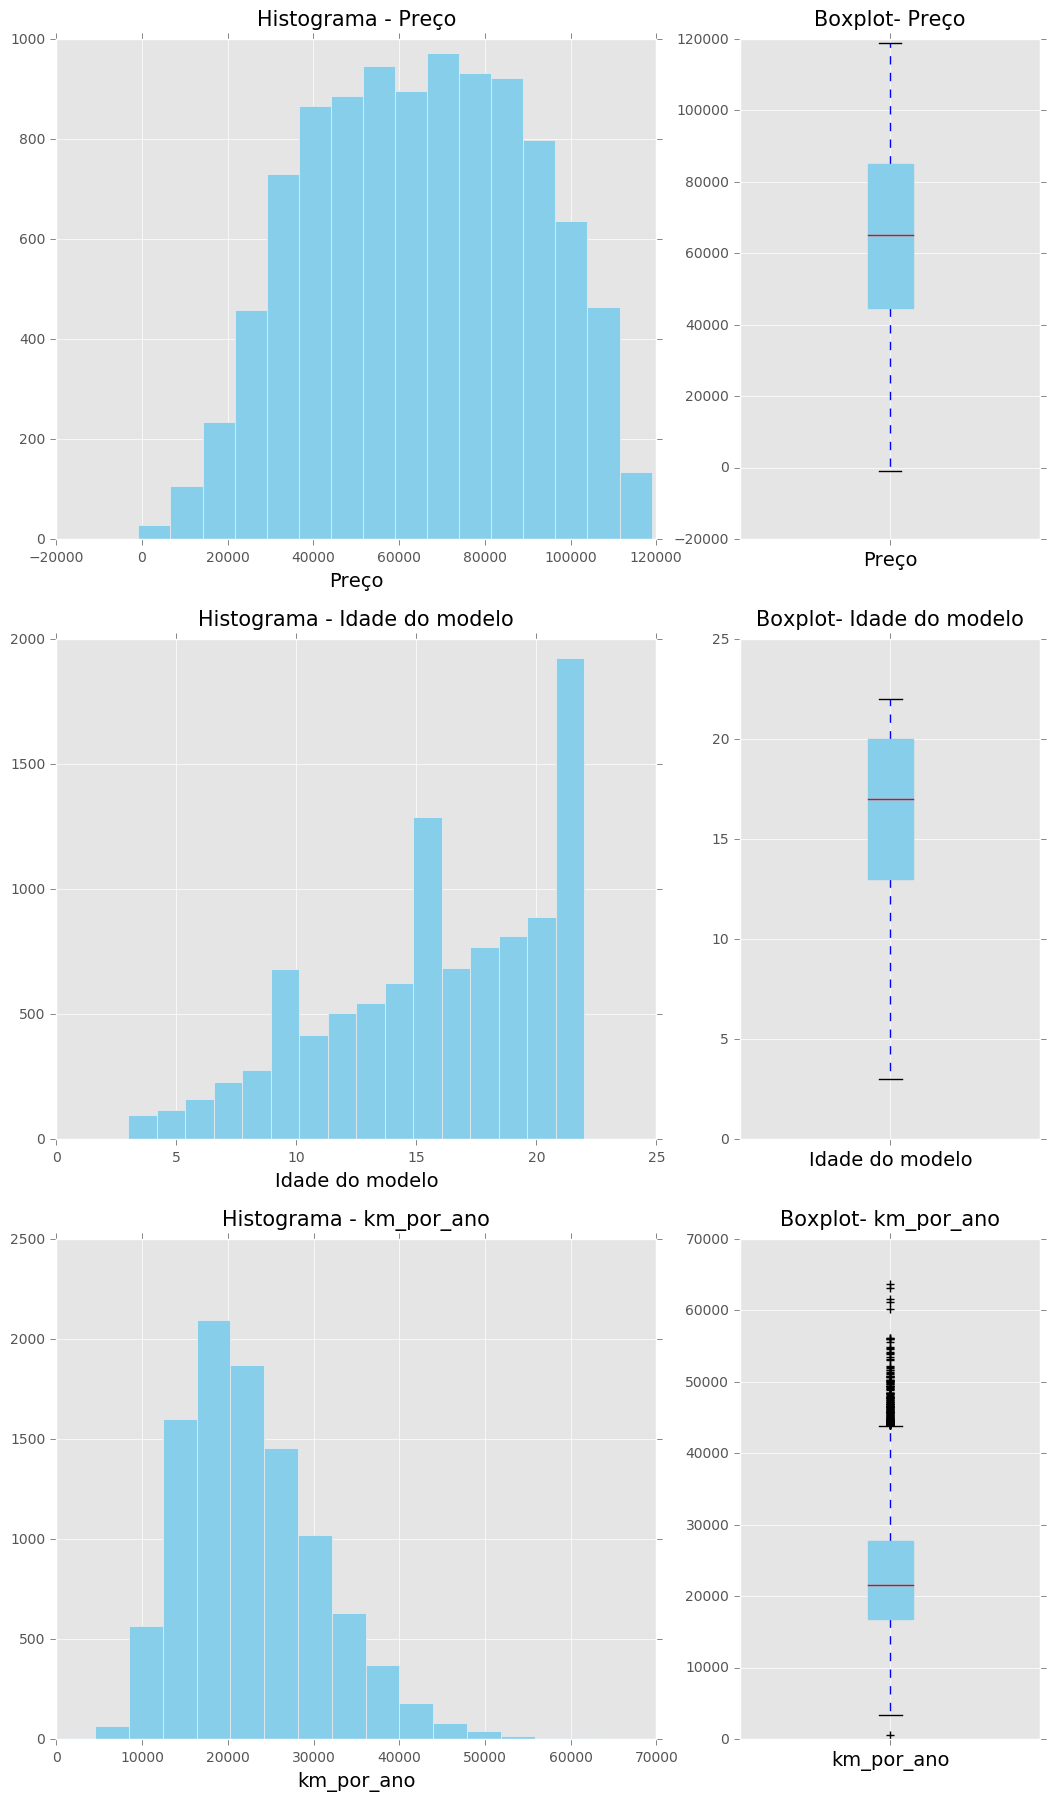

In [157]:
largura, altura = Image.open('hist1.png').size
comb = Image.new("RGB", (largura, 3 * altura))
acrescimo = 0

for imagem in map(Image.open, ['hist1.png', 'hist2.png', 'hist3.png']):
    
    comb.paste(imagem, (0, acrescimo))
    acrescimo += altura
    
comb.save('comb.png')
comb

# D. Separando os Dados <br>


## Di. Separando em dados de treino e teste
<a id="train_test_"></a>

In [158]:
from sklearn.model_selection import train_test_split as tts

In [166]:
# Fixando um seed
np.random.seed(2020)

x = dados[['Preco', 'km_por_ano', 'idade_do_modelo']]
y = dados['Vendido']

train_x, test_x, train_y, test_y = tts(x, y, test_size=.2, stratify=y)

train_x = np.array(train_x, dtype='float32')
train_y = np.array(train_y, dtype='float32')
test_x = np.array(test_x, dtype='float32')
test_y = np.array(test_y, dtype='float32')

# E. Algoritmo de Base <br>

## Ei. DummyClassifer
<a id="dummy"></a>

In [168]:
from sklearn.dummy import DummyClassifier

In [171]:
dummy = DummyClassifier(strategy='stratified')

In [172]:
dummy.fit(train_x, train_y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [174]:
# Accuracy
print(f'Accuracy-: {(dummy.score(test_x, test_y) * 100):.2f}%')

Accuracy-: 52.90%


# F. Arvore de Decisão <br>

## Fi. DecisionTreeClassifier
<a id="decision"></a>

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [195]:
modelo = DecisionTreeClassifier(max_depth=3)

In [196]:
modelo.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [197]:
previsoes = modelo.predict(test_x)
print(f'Accuracy-: {(accuracy_score(test_y, previsoes) * 100):.2f}%')

Accuracy-: 77.45%


## Fii. Visualizando Arvore

<a id="arvore"></a>

In [198]:
import graphviz
from sklearn.tree import export_graphviz

In [199]:
dot_data = export_graphviz(modelo, feature_names=x.columns, rounded=True, filled=True,
                          class_names=["Não comprou", 'Comprou'])

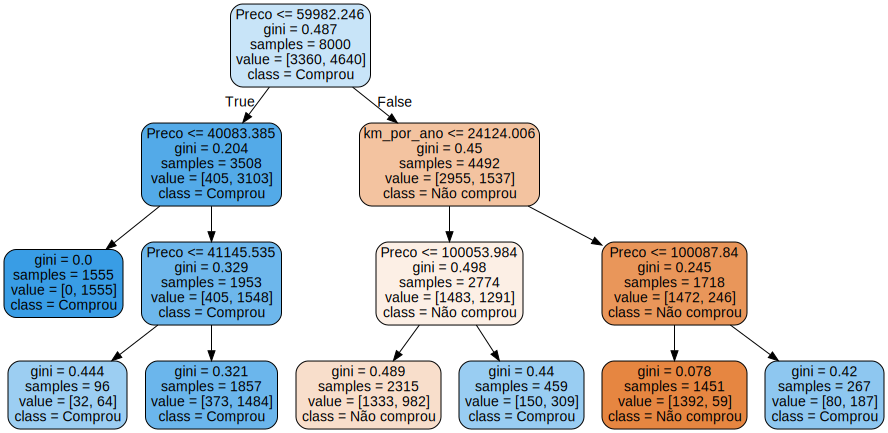

In [200]:
grafico = graphviz.Source(dot_data)
grafico